In [44]:
#level1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import GridSearchCV


In [45]:
# Load the digits dataset
digits = load_digits()


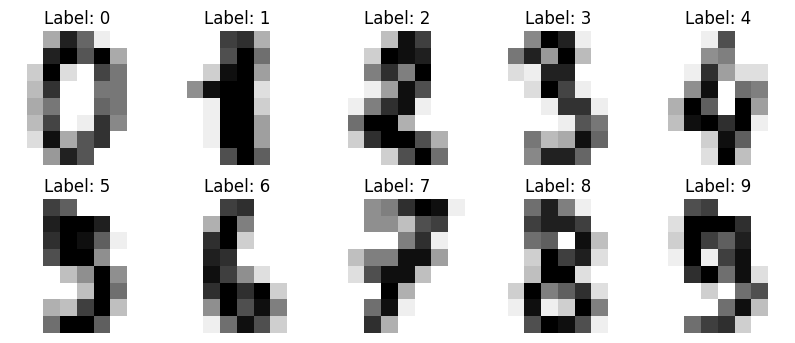

In [46]:
# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [48]:
# Scale the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [49]:
# Define the K-means models
simple_kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, random_state=42)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=256, random_state=42)

In [50]:
# Fit the models to the data
simple_kmeans.fit(X_train)
mini_batch_kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=256, n_clusters=10, random_state=42)

In [51]:
# Find the optimal number of clusters using the elbow method and silhouette coefficient
k_range = range(2, 20)
inertias = []
sil_scores = []
for k in k_range:
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_train, kmeans.labels_))


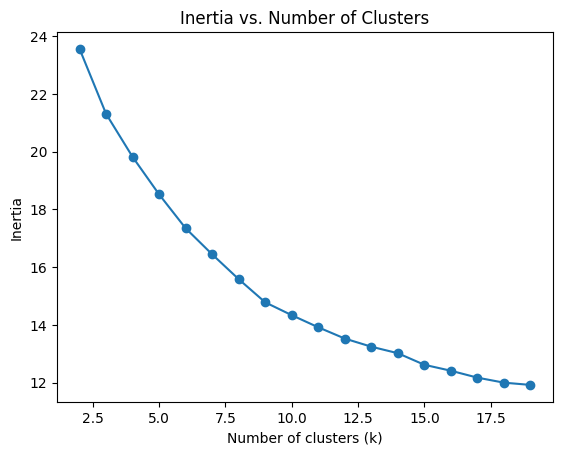

In [52]:
# Compare the inertia of the simple and mini-batch K-means as k increases
fig, ax = plt.subplots()
ax.plot(k_range, inertias, marker='o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Inertia')
ax.set_title('Inertia vs. Number of Clusters')
plt.show()

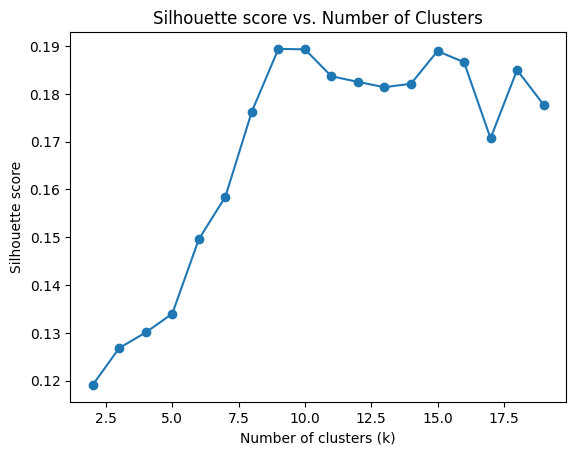

In [53]:
# Plot the silhouette scores for each number of clusters
fig, ax = plt.subplots()
ax.plot(k_range, sil_scores, marker='o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
ax.set_title('Silhouette score vs. Number of Clusters')
plt.show()

In [54]:
# Tune the hyperparameter k using GridSearchCV
param_grid = {'n_clusters': range(2, 20)}
grid_search = GridSearchCV(KMeans(init='k-means++', n_init=10, random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train)
print("Best parameters: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters:  {'n_clusters': 2}


In [55]:
#level2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans


In [56]:
# Load the digits dataset
digits = load_digits()

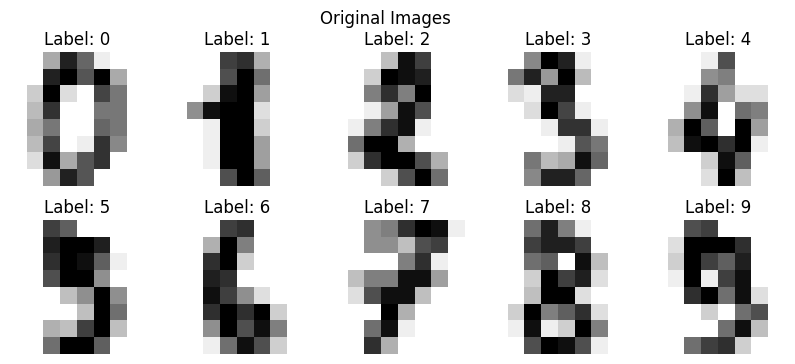

In [57]:
# Display some sample original images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Original Images")
plt.show()

In [58]:
# Reshape the images into a flattened representation
X = digits.images.reshape(len(digits.images), -1)

In [59]:
# Perform K-means clustering for image segmentation
n_clusters = 10  # Number of clusters (can be adjusted)
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [60]:
# Obtain the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

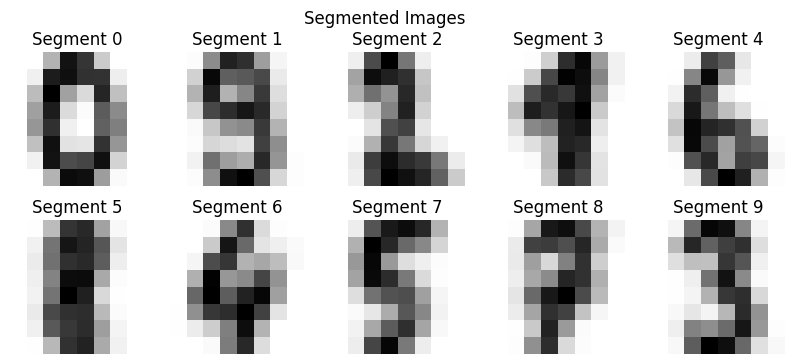

In [61]:
# Display the segmented images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, cluster_center, label in zip(axes.ravel(), cluster_centers, range(n_clusters)):
    ax.imshow(cluster_center.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Segment {label}")
    ax.axis('off')
plt.suptitle("Segmented Images")
plt.show()

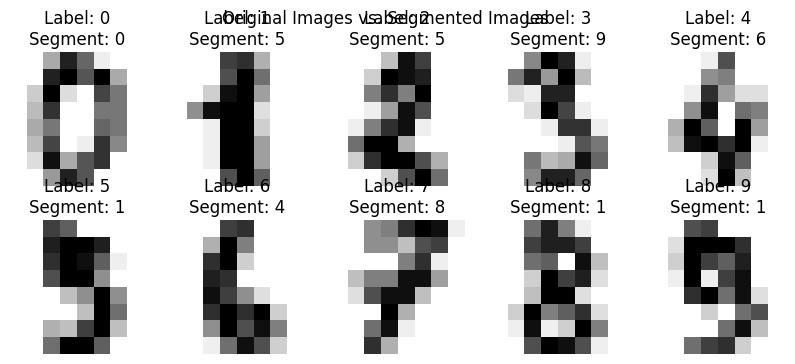

In [62]:


# Display the original images and segmented images side by side
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, image, cluster_label, label in zip(axes.ravel(), digits.images, cluster_labels, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {label}\nSegment: {cluster_label}")
    ax.axis('off')
plt.suptitle("Original Images vs. Segmented Images")
plt.show()
